# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments
Project submission by Edward Minnett (ed@methodic.io).

July 24th 2016. (Revision 2)

-------

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [9]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [10]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# import random
# indices = random.sample(range(0,data.shape[0]-1), 3)
indices = [407, 168, 281]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7362,12844,18683,2854,7883,553
1,5809,735,803,1393,79,429
2,12238,7108,6235,1093,2328,2079


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
407   45.7  91.1     89.8    68.9              91.1          32.5
168   37.7   7.5      5.0    47.5               7.5          26.1
281   65.2  74.5     58.4    39.3              65.7          78.9


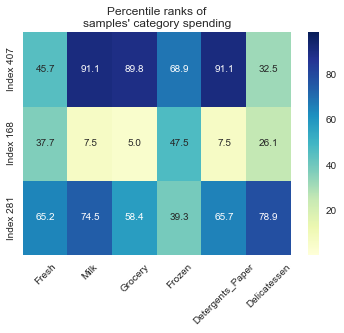

In [35]:
# The project reviewer suggested using a heatmap representation of the percentage va;ues for the 3 samples.
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_of_samples():
    # look at percentile ranks
    pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
    print pcts

    # visualise percentiles with heatmap
    sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
    plt.title('Percentile ranks of\nsamples\' category spending')
    plt.xticks(rotation=45, ha='center');

plot_heatmap_of_samples()

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** The three sample customers differ both in the size of their total purchases as well as the category where they spent the most money. I think the three samples could be described as follows:

- 0: **Cafe Chain**: They spent within the 4th quartile of Grocery, Milk, and Detergents while their spending was in the second quartile for the Delicatessen and Fresh categories. Their spending for the Frozen category was in the 3rd quartile. Though the scale of the purchase may mean they are a retailer, I think a retailer would have spent more in the Selicatessen and Fresh categories. I don't think a cafe would spend much money on fresh produce but would spent a lot on Milk products. The combination of the relative distribution of spending and scale of spending leads me to bleieve sample 0 describes the spending of a Cafe Chain.
- 1: **Smoothie & Snack Stand**: They scale of spending in all of the categories is relatively small (especially compared to sample 0). This leads me to believe that this customer represents a small enterprise like a mobile sandwich stand. The categories with the greatest expense were Fresh and Frozen. I imagine a smoothie stand would spend a disproportionate amount of their total spending on fresh and frozen fruit along with a smaller amount spent on Dairy and Grocery products such as milk and juices. Perhaps the money spent within the Delicatessen category was for snacks that are sold along side the smoothies.
- 2: **Upscale Restaurant**: The amount spent in every category was in the 3rd quartile except for Frozen and Delicatessen which were in the 2nd and 4th quartiles respectively. The large amount of money spent within the Delicatessen category along with the volumes in Fresh, Milk, and Grocery suggest a business that prepares a large volume of food made with decent ingredients. The small amount spent on Frozen items suggest it is more likley to be an establishment servingh 'slow' food rather than 'fast' food. The amount spent on detergents is below average, but not a small amount suggesting the business has a full sized kitchen or premanent location compared to a food truck or coffee shop that are would both be smaller in scale and less likely to need significant cleaning.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Fresh', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Fresh'], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "The coefficinet of detrmination is: {}".format(score)

The coefficinet of detrmination is: -0.385749710204


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** The coefficient of determination is negative meaning the rgeressor failed to fit the data excluding the 'Fresh' column to the 'Fresh' column as the target. This suggests that the 'Fresh' column is needed help identify and differentiate customer's spending habits. If the coefficient of determination was positive it would suggest that the feature could be represented by the other features and would not be needed, but this is not the case.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

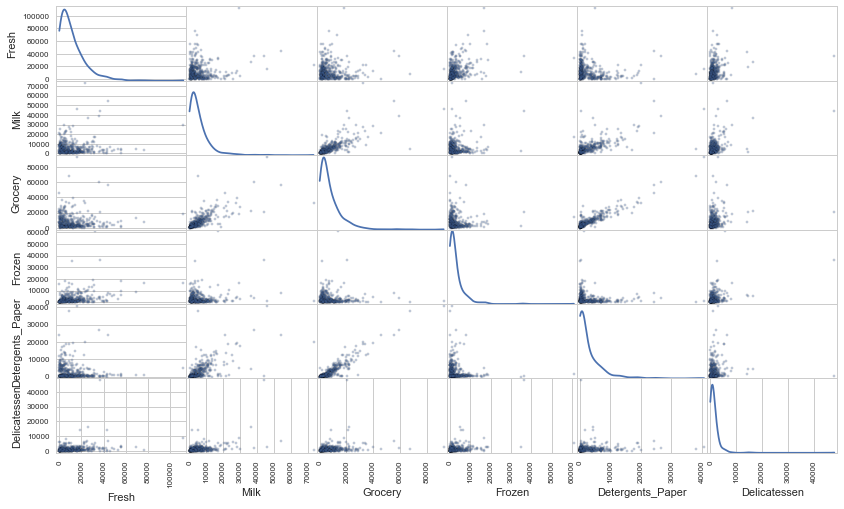

In [20]:
# Produce a scatter matrix for each pair of features in the data
sns.set_style("whitegrid")
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** The strongest correlation appears to be ebtween the 'Grocery' and 'Detergents_Paper' categories with the correlations between 'Milk' and 'Grocery' and 'Milk' and 'Detergents_Paper' displaying a noticeable, but less strong relationship. This suggests that there is likely to be a relatinship in the amounts spent between all three categories. The fact that the 'Fresh' column does not have a strong correlation with the other columns confirms the finding that the 5 remaining categories could not be used to predect the amount spent in the 'Fresh'category. The data does not appear to be normally distributed. The data exhibits a significant skew toward 0 suggesting the data displays more of a Poison distribution [1]. This can be confirmed by plotting the correlation scores as a heatmap.

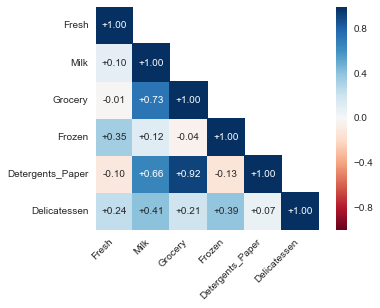

In [21]:
# The project reviewer suggested using a heatmap representation of the correlations scores to better visualise the 
# degree of correlation between the different feature.
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.2f')
    plt.xticks(rotation=45, ha='right');

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

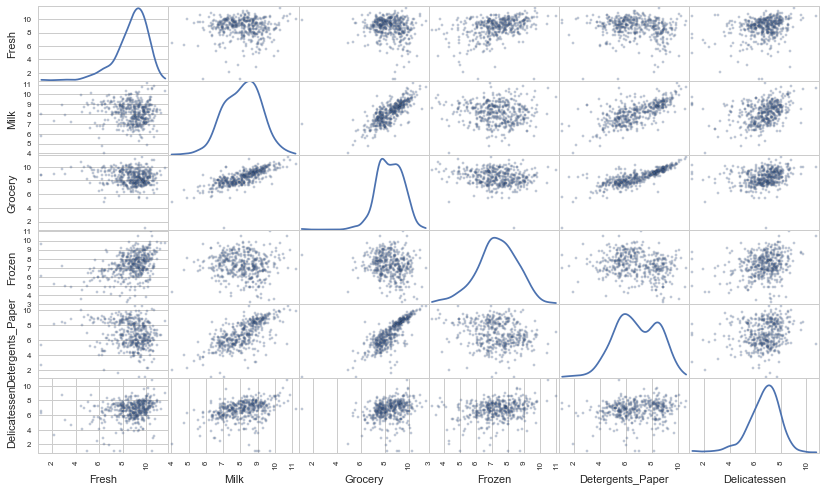

In [22]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [23]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.904087,9.460632,9.835369,7.956477,8.972464,6.315358
1,8.667164,6.599870,6.688355,7.239215,4.369448,6.061457
2,9.412301,8.868976,8.737934,6.996681,7.752765,7.639642


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [24]:
# For each feature find the data points with extreme high or low values
ouliers_by_feature = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    ouliers_by_feature[feature] = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(ouliers_by_feature[feature])
    
# OPTIONAL: Select the indices for data points you wish to remove
# A reasonable approach would be to consider a row an outlier if it contains outlier values for at least 2 features:
from collections import Counter
all_indices = [df.index.tolist() for feature, df in ouliers_by_feature.iteritems()]
flattened_indices = [index for index_list in all_indices for index in index_list]
outliers  = [index for index, count in Counter(flattened_indices).iteritems() if count > 1]
print "Indices for rows that include outliers for multiple features: '{}'".format(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Indices for rows that include outliers for multiple features: '[128, 154, 65, 66, 75]'


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There are 5 rows that include outlier values for more than one feature. I think it is reasonable to consider these rows not just outliers for a single feature, but outliers for the whole data set as their presence could introduce unwanted noise when looking for relationships within the data. These 5 indices have been added to the outliers list.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

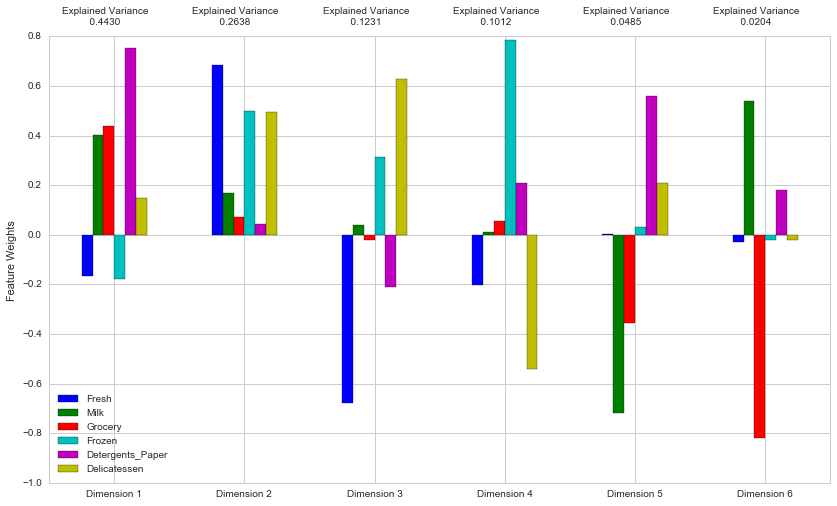

In [25]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first 2 principal components explain 70.68% of the total variance while the first 4 prinicpal components explain 93.11% of the total variance. I think the first four principal components can be described in terms of spending habits as follows:

- 1: **Packaged Products**: Of all the principle components, this one is is most strongly correlated with spending in the Detergents_Paper category. Even though the component is also correlated with spending in the 'Milk' and 'Grocery' categotries it is also negatively correlated with spending in the 'Fresh' and 'Frozen' categories, I think the spending behaviour would most concisely be categoriesd as spening on packaged consumable products. This products would be dominated by those in the 'Detergents_Paper' category but would also include processed products such as bottled juices and a variety of packaged foods. I imagine this component might help differentiate between customers who resell packaged, branded products such as a retailer compared to customers who buy ingredients and use those ingredients in combination and sell what has been made as restaurants do.
- 2: **Fresh Food and Ingredients**: Unlike the first principle component, this one is most strongly correlated with spending in the 'Fresh', 'Frozen', and 'Delicatessen'. This component feels like the opposite of the first principal component (which would make sense as they are orthogonal). I feel this component describes spending on ingredients and fresh food. I imagine this would help identify customers who buy products in order to make them into something new to then sell to their own customers as restaurants and cafes do.
- 3: **Vegetarian Diets vs High Protein Diets**: This principle component is dominated by a very strong positive correlation with spending inthe 'Delicatessen' category and a strong negative correlation with spending on 'Fresh' products. I imagine this could help differentiated between the diets the customers cater to. For exmaple, this component could help differentiate between customers who cater to vegetarian / vegan diets compared to customers who primarily serve meat such as a mobile BBQ van or a steak grill.  
- 4: **Frozen Food**: This principle components is largely defined by a correlation in spending in the 'Frozen' category with large negative correlations for 'Fresh' and 'Delicatessen' products. I imagine this describes the purchasing behaviour of an organisation that buys products for use over a long period of time most likely with set menus that don't vary over that time. I imagine this could help identify an institution such as a school district or hospital as well fast food restaurants or pubs that handle a lot of frozen products.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [26]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.5781,0.6356,-0.5657,1.2230,-0.2918,-0.0218
1,-3.2785,-0.9078,0.1302,-0.3310,0.2375,0.2022
2,1.2276,0.9298,-0.1240,-0.6773,0.0896,0.3154


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

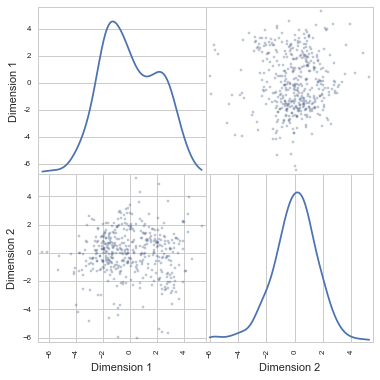

In [28]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# The project reviewer suggested producing a scatter plot of the reduced dimensions to start to get a sense of 
# any patterns they may exhibit.
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [29]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.5781,0.6356
1,-3.2785,-0.9078
2,1.2276,0.9298


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means clustering is fast, ribust and easy to understand. It is relatively efficient and provides good results when the clusters are distinct, but K-Means does require prior knowledge of the data to specify the expected number of clusters [2]. Gaussian Misture Model clustering is more flexible than K-Means clustering as it is a 'fuzzy' or soft clustering method allowing the algorithm to assign a datum to more than one cluster weighted by the probability of belonging to one cluster over another [3]. Given what we know about the data so far, it is unlikely that the clusters within the data are going to be distinct. For this reason, it makes sense to use Gaussian Mixture Model clustering instead of K-Means.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [30]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import silhouette_score

def cluster_and_score(num_clusters):
    clusterer = g = mixture.GMM(n_components=num_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = g.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = g.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = g.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)

    print "Silhouette Score for {} clusters: {}".format(num_clusters, score)
    
    return (preds, centers, sample_preds, score)

for n in range(2, 20):
    cluster_and_score(n)

print "\nThe largest Slihouette Score is for 2 clusters."
preds, centers, sample_preds, score = cluster_and_score(2)

Silhouette Score for 2 clusters: 0.411818864386
Silhouette Score for 3 clusters: 0.372313708076
Silhouette Score for 4 clusters: 0.34454314132
Silhouette Score for 5 clusters: 0.275016994339
Silhouette Score for 6 clusters: 0.276052801963
Silhouette Score for 7 clusters: 0.322831665079
Silhouette Score for 8 clusters: 0.325995165469
Silhouette Score for 9 clusters: 0.283495636492
Silhouette Score for 10 clusters: 0.2695974398
Silhouette Score for 11 clusters: 0.295942938474
Silhouette Score for 12 clusters: 0.266298586876
Silhouette Score for 13 clusters: 0.266515522382
Silhouette Score for 14 clusters: 0.249453286419
Silhouette Score for 15 clusters: 0.257147635456
Silhouette Score for 16 clusters: 0.245004128446
Silhouette Score for 17 clusters: 0.216776010236
Silhouette Score for 18 clusters: 0.201453706807
Silhouette Score for 19 clusters: 0.216003395497

The largest Slihouette Score is for 2 clusters.
Silhouette Score for 2 clusters: 0.411818864386


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** As can be seen above, the largest silhouette score for the Gaussian Mixture Model clusterer using the data reduced to two principle components is for 2 clusters (when compared to all values from 2 to 20).

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

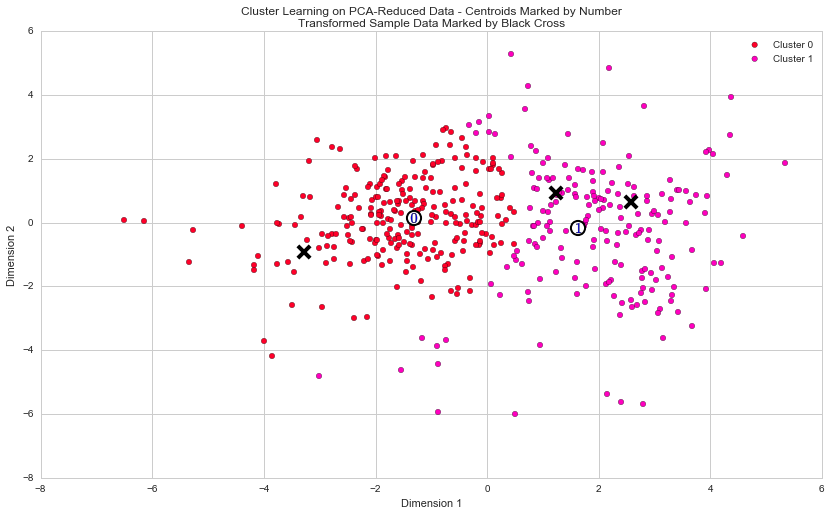

In [31]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [32]:
# TODO: Inverse transform the centers
log_centers =  pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812,2052,2689,2058,337,712
Segment 1,4316,6347,9555,1036,3046,945


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** I think the two segments can be categorised as follows:

- Segment 0: **Independent Restaurants & Cafes**: Segment 0 is defined as a smaller customer that spends most of their budget on 'Fresh' products (3rd quartile) with almost all of the remainder on 'Milk', 'Grocery', and 'Frozen' products (2nd, 2nd and 3rd quartiles respectively) and then lastly 'Detergents_Papeer' and 'Delicatessen' (both in the 2nd quartile). All 6 values are below the mean for each category. Given the relationships between these values, which quartile they reside in and the mean for each category, I imagine Segemnt 0 makes up a larger number of customers, but each customer spends a smaller amount than those in Segment 1. The reliance on 'Fresh' products and lack of 'Detergents_Paper' leads me to believe that this segment represents businesses that buy ingredients, use the ingredients to prepare 'meals' or other products (snacks, drinks, etc.) and then sell the products made from the ingredients rather than reselling the ingredients themselves. Though this is speculation, I imagine customers in this segment make purchases more frequently than customers in Segment 1.
- Segment 1: **Chains, Institutions & Retailers**: Customers in Segemnt 1 spend more money in total and in every category except 'Fresh' and 'Frozen' than customers in Segment 0. The center of this segement has values for 'Milk', 'Grocery' and 'Detergents_Paper' that are all in the 3rd quartile and above the mean for each category. Given the fact that most of the money for each customer is spent in these three categories and the scale of the puchases in total, I believe that this segement represenst Chains, or groups of multiple restautrants that benefit from group-bulk purchasing, institutions that have a high turnover of consumers, and retails who simply resell the products without much or any 'processing'.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [33]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
407   45.7  91.1     89.8    68.9              91.1          32.5
168   37.7   7.5      5.0    47.5               7.5          26.1
281   65.2  74.5     58.4    39.3              65.7          78.9


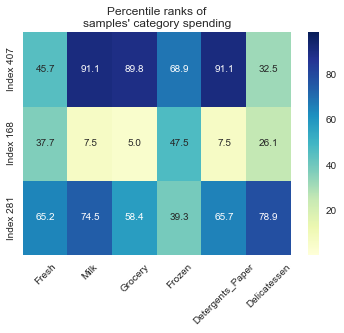

In [36]:
# To help explain the predicted clusters for each sample, it will make sense to reference the heatmap of the samples.
plot_heatmap_of_samples()

**Answer:** Of the three sample points, I think I correctly guessed the segemnt for samples 0 and 1. I imagined that sample 0 was a chain of cafes and this would fit into 'Chains, Institutions & Retailers' while the notion that sample 1 is a Smoothie & Snack Stand would place them in 'Independent Restaurants & Cafes'. I thought sample 2 was an 'Upscale Restaurant' and even though this may still be true, the analysis suggests that they are mor e likely to be a retailer or institution. The three samples appear to match (or not) the cluster predictions as follows:

- **Sample 0 Cluster 1**: The first sample record spent a considerable amount in 'Milk', 'Grocery', 'Frozen', and 'Detergents_Paper' when compared to the whole data set. Both the volume of spending and the categeories suggest that this customer is a retailer or institution which means it probably does belong in cluster 1.
- **Sample 1 Cluster 0**: The total volume of spending of this sample record is low compared to the rest of the data set. Most of their spending was on 'Fresh' and 'Frozen' products. Even though 'Frozen' products could indicate belonging to either customer segment, the proportional spending on 'Fresh' products suggests the customer is a cafe or restaurant and as a result probably does belong in cluster 0.
- **Sample 2 Cluster 1**: Even though this smaple customer didn't spend a huge amount in any particular category, the fact they were above the median in spending for most of the categpries suggests they are probably a retailer and as a result do belong in cluster 1.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Based on my assumptions about the cycle of deliveries for the two customer segments 'Independent Restaurants & Cafes' vs. 'Chains, Institutions & Retailers', the 'Independent Restaurants & Cafes' segment will be affected most by a change in the delivery service. 'Chains, Institutions & Retailers' are more likely able to accomodate less frequent deliveries. I would, as a result, suggest that the results of the A/B test be broken down by the two customer segments. It is quite possible the the distribution of feedback differs between the two segements. This information could ultimately lead to a compromise in how the delivery service is modified. For example, the compromise could result in higher frequency smaller deliveries could be offered only to 'Independent Restaurants & Cafes' using smaller, less expensive to operate, vehicles while the larger deliveries could still be offered but less often.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The existing data could act as training data in combination with known target classifications for the two customer segements. This data could then be used to train a supervised classification model where the categorised annual spending is used to predict the classification within the two customer segements. The trainied model could then be used to predeict which of the two segments the 10 new customers belong to.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

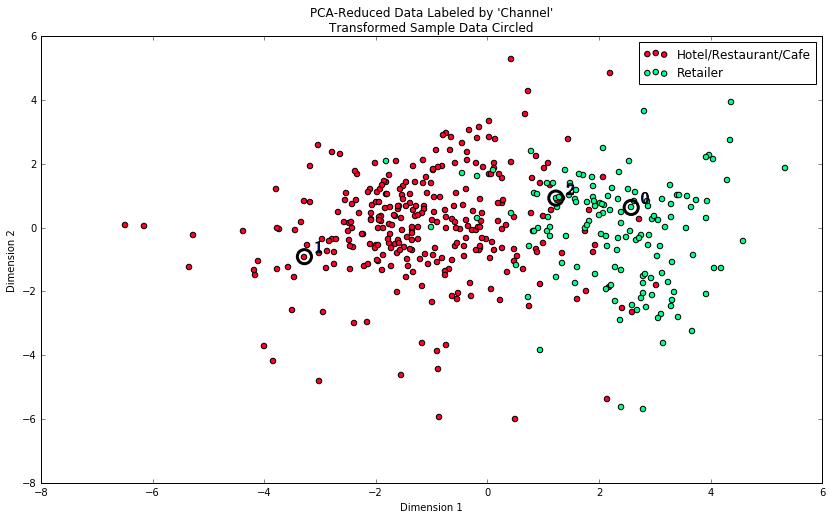

In [18]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** Though the engineered customer segementation and the two channels do differ slightly, they are remarkably similar. There is a less clear division between the labeled channels than the engineered segments and I think my descriptions of the segments might be more accurate than the strict speration between 'Retailers' and 'Hotels/Restaurants/Cafes'. An institutional 'restaurant' or a chain of restaurants / hotels that buy products under a single account are more likely to resemble retailers in terms of their customer segement than when compared to smaller enterprises like a single hotel or independent restaurant. Apart from this minor critique, the channel labels do match the expectations of and reinforce the seperation found in the engineered customer segements.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### References

[1] Wikipedia contributors, "Poisson distribution," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Poisson_distribution&oldid=728514975 (accessed July 23, 2016).

[2] Naik, A. "K-Means Clustering Algorithm." Data Clustering Algorithms.  https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm (accessed July 23, 2016).

[3] "Clustering Using Gaussian Mixture Models." Matlab Documentation. http://uk.mathworks.com/help/stats/clustering-using-gaussian-mixture-models.html?requestedDomain=www.mathworks.com (accessed July 23, 2016).